# Cross-match MMU catalogs with LSDB

We are going to use LSDB to cross-match two MMU catalogs converted to HATS format using this code:
https://github.com/UniverseTBD/toy-mmu/tree/main/mmu-to-hats

See LSDB documentation here: https://docs.lsdb.io

In [ ]:
# Uncomment to install LSDB
# %pip install -U lsdb

In [1]:
import lsdb
from dask.distributed import Client

### Read DESI catalog metadata
LSDB's `open_catalog` would just read metadata, not the entire catalog.

In [2]:
desi = lsdb.open_catalog('hf://datasets/LSDB/mmu_desi_edr_sv3')
desi

/Users/hombit/.virtualenvs/lsdb-release/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,spectrum,Z,ZERR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,ra,dec,ZWARN,object_id
npartitions=3157,,,,,,,,,,,,,,,,,,,,
"Order: 8, Pixel: 146319","nested<flux: [float], ivar: [float], lsf_sigma...",float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],double[pyarrow],double[pyarrow],bool[pyarrow],string[pyarrow]
"Order: 7, Pixel: 36581",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 8, Pixel: 450399",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 6, Pixel: 28151",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Read SDSS catalog metadata

In [3]:
sdss = lsdb.open_catalog('hf://datasets/LSDB/mmu_sdss_sdss')
sdss

,spectrum,VDISP,VDISP_ERR,Z,Z_ERR,ra,dec,healpix,ZWARNING,SPECTROFLUX_U,SPECTROFLUX_G,SPECTROFLUX_R,SPECTROFLUX_I,SPECTROFLUX_Z,SPECTROFLUX_IVAR_U,SPECTROFLUX_IVAR_G,SPECTROFLUX_IVAR_R,SPECTROFLUX_IVAR_I,SPECTROFLUX_IVAR_Z,SPECTROSYNFLUX_U,SPECTROSYNFLUX_G,SPECTROSYNFLUX_R,SPECTROSYNFLUX_I,SPECTROSYNFLUX_Z,SPECTROSYNFLUX_IVAR_U,SPECTROSYNFLUX_IVAR_G,SPECTROSYNFLUX_IVAR_R,SPECTROSYNFLUX_IVAR_I,SPECTROSYNFLUX_IVAR_Z,object_id
npartitions=789,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 4, Pixel: 0","nested<flux: [float], ivar: [float], lsf_sigma...",float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],bool[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],string[pyarrow]
"Order: 4, Pixel: 32",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 4, Pixel: 3070",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 4, Pixel: 3071",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Plan cross-match

Again, we don't load any data here, just planning the job

In [4]:
xmatch = desi.crossmatch(sdss, suffixes=["_desi", "_sdss"], suffix_method="overlapping_columns")
xmatch

+-----------+---------------------+----------------------+
|  Column   | Left (suffix=_desi) | Right (suffix=_sdss) |
+-----------+---------------------+----------------------+
|    ra     |       ra_desi       |       ra_sdss        |
|    dec    |      dec_desi       |       dec_sdss       |
| spectrum  |    spectrum_desi    |    spectrum_sdss     |
|     Z     |       Z_desi        |        Z_sdss        |
| object_id |   object_id_desi    |    object_id_sdss    |
+-----------+---------------------+----------------------+


,spectrum_desi,Z_desi,ZERR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,ra_desi,dec_desi,ZWARN,object_id_desi,spectrum_sdss,VDISP,VDISP_ERR,Z_sdss,Z_ERR,ra_sdss,dec_sdss,healpix,ZWARNING,SPECTROFLUX_U,SPECTROFLUX_G,SPECTROFLUX_R,SPECTROFLUX_I,SPECTROFLUX_Z,SPECTROFLUX_IVAR_U,SPECTROFLUX_IVAR_G,SPECTROFLUX_IVAR_R,SPECTROFLUX_IVAR_I,SPECTROFLUX_IVAR_Z,SPECTROSYNFLUX_U,SPECTROSYNFLUX_G,SPECTROSYNFLUX_R,SPECTROSYNFLUX_I,SPECTROSYNFLUX_Z,SPECTROSYNFLUX_IVAR_U,SPECTROSYNFLUX_IVAR_G,SPECTROSYNFLUX_IVAR_R,SPECTROSYNFLUX_IVAR_I,SPECTROSYNFLUX_IVAR_Z,object_id_sdss,_dist_arcsec
npartitions=2246,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 8, Pixel: 146319","nested<flux: [float], ivar: [float], lsf_sigma...",float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],double[pyarrow],double[pyarrow],bool[pyarrow],string[pyarrow],"nested<flux: [float], ivar: [float], lsf_sigma...",float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],double[pyarrow],double[pyarrow],int64[pyarrow],bool[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],string[pyarrow],double[pyarrow]
"Order: 7, Pixel: 36581",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 8, Pixel: 450399",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 6, Pixel: 28151",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Get first ten cross-matching results

LSDB uses Dask for parallel and out-of-memory compute. Here we create a small Dask cluster with just a single worker, and compute the first 10 rows.

You can change `.head(10)` to `.compute()` to load the entire dataset into memory (could be really large!), or `.write_catalog(<path>)` to save the result to disk (would not get all the data into memory at once).

In [5]:
with Client(n_workers=1) as client:
    display(client)
    df = xmatch.head(10)
df

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 12,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:61380,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:61386,Total threads: 12
Dashboard: http://127.0.0.1:61387/status,Memory: 32.00 GiB
Nanny: tcp://127.0.0.1:61383,


spectrum_desi  \
_healpix_29                                                             
643522000420161956  [{flux: -0.18108, ivar: 0.009851, lsf_sigma: 0...   
643555775767970253  [{flux: -5.900863, ivar: 0.003323, lsf_sigma: ...   
643556980332533976  [{flux: 11.359154, ivar: 0.014145, lsf_sigma: ...   
643557326058163767  [{flux: 10.748082, ivar: 0.004371, lsf_sigma: ...   
643567167238686735  [{flux: 3.904026, ivar: 0.008518, lsf_sigma: 0...   
643567610832314692  [{flux: 4.701368, ivar: 0.101991, lsf_sigma: 0...   
643568021107718149  [{flux: 8.194274, ivar: 0.141858, lsf_sigma: 0...   
643568370097043927  [{flux: 3.857704, ivar: 0.027456, lsf_sigma: 0...   
643571584989711768  [{flux: -5.253837, ivar: 0.004734, lsf_sigma: ...   
643571841027283945  [{flux: -25.935995, ivar: 0.001774, lsf_sigma:...   

                      Z_desi      ZERR       EBV      FLUX_G      FLUX_R  \
_healpix_29                                                                
643522000420161956  0.131645   0.00005  0.008369   48.863625   97.339874   
643555775767970253  0.385048  0.000166  0.011146    5.959754   31.534227   
643556980332533976  0.084921  0.000022  0.012773   50.701889  124.927467   
643557326058163767  0.093878  0.000006  0.015708  163.324493  332.211975   
643567167238686735  0.086169  0.000019  0.007919   43.174492   97.203979   
643567610832314692  0.378014  0.000067  0.008666    4.210397   24.636671   
643568021107718149  0.593694  0.000042  0.008812    19.17547   21.373417   
643568370097043927  0.084525  0.000008  0.007976   55.168053  118.025803   
643571584989711768 -0.000408  0.000006  0.009003       -99.0       -99.0   
643571841027283945 -0.000007  0.000002  0.008883       -99.0       -99.0   

                        FLUX_Z  FLUX_IVAR_G  FLUX_IVAR_R  FLUX_IVAR_Z  ...  \
_healpix_29                                                            ...   
643522000420161956  160.230515    17.846851     9.826334     5.348298  ...   
643555775767970253   70.566673    48.757492    10.267361     4.112587  ...   
643556980332533976  231.375717    77.086815    39.259766    13.396832  ...   
643557326058163767  675.628296    22.859257    15.503612     2.814007  ...   
643567167238686735  170.564697    57.942169    43.644066     5.245755  ...   
643567610832314692   66.891197   128.162766    60.603291     6.940703  ...   
643568021107718149   21.514185   178.858734   158.840027    82.771866  ...   
643568370097043927  210.833832    38.302998    23.129204     6.013629  ...   
643571584989711768       -99.0        -99.0        -99.0        -99.0  ...   
643571841027283945       -99.0        -99.0        -99.0        -99.0  ...   

                    SPECTROSYNFLUX_R  SPECTROSYNFLUX_I  SPECTROSYNFLUX_Z  \
_healpix_29                                                                
643522000420161956         16.916286          25.49715         33.686283   
643555775767970253          8.101106         15.806009         23.149637   
643556980332533976         75.984688        110.778656        143.795227   
643557326058163767        144.282242        232.657166         291.52713   
643567167238686735         35.486694         51.578583         64.879333   
643567610832314692          7.717674         16.372593         25.635996   
643568021107718149         19.159245         24.155146         22.959301   
643568370097043927         26.015545         40.588696          54.02232   
643571584989711768         66.283371        110.007446        141.202789   
643571841027283945         82.545952        374.579773        810.731567   

                    SPECTROSYNFLUX_IVAR_U  SPECTROSYNFLUX_IVAR_G  \
_healpix_29                                                        
643522000420161956               2.794419               4.219925   
643555775767970253               2.794419               4.219925   
643556980332533976               2.794419               4.219925   
643557326058163767               2.794419               4.219925   
64356716

### Plot a spectrum

Plot a cross-matching result for a single high signal-to-noise object.

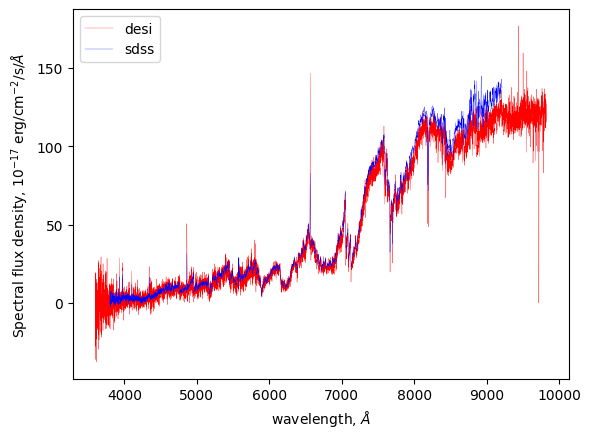

In [6]:
import matplotlib.pyplot as plt

row = df.iloc[-1]
plt.plot(row.spectrum_desi['lambda'], row.spectrum_desi['flux'], label='desi', lw=0.2, color='red')
plt.plot(row.spectrum_sdss['lambda'], row.spectrum_sdss['flux'], label='sdss', lw=0.2, color='blue')
plt.xlabel(r'wavelength, $\AA$')
plt.ylabel(r'Spectral flux density, $10^{-17}$ erg/cm$^{-2}$/s/$\AA$')
plt.legend()